# Exploratory Data Analysis 

#### Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import time
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

#### Read the data into a pandas dataframe

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/original_raw_data.csv')

## Phase 1 Data Summary

In [10]:
# Data summary
def data_summary(df):
    # Basic information about the dataset
    print("Dataset shape:")
    print(df.shape)
    print("\nDataset columns:")
    print(df.columns)
    print("\nData types:")
    print(df.dtypes)

    # Removing the 'Unnamed: 0' column
    df = df.drop('Unnamed: 0', axis=1)
    print("\nUpdated columns after removing 'Unnamed: 0':")
    print(df.columns)

    # Basic statistics for continuous columns
    print("\nBasic statistics for continuous columns:")
    print(df.describe())

    # Basic statistics for categorical columns
    print("\nBasic statistics for categorical columns:")
    print(df['class'].value_counts())

    # Additional basic statistics
    continuous_columns = ['count', 'hate_speech', 'offensive_language', 'neither']
    for col in continuous_columns:
        print(f"\nAdditional statistics for {col}:")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Mode: {df[col].mode().values[0]}")
        print(f"Min: {df[col].min()}")
        print(f"Max: {df[col].max()}")

    # Suggested plots
    print("\nSuggested plots:")
    print("1. Histograms for continuous columns (count, hate_speech, offensive_language, neither)")
    print("2. Bar plots for the categorical column (class)")
    print("3. Box plots for continuous columns (count, hate_speech, offensive_language, neither)")
    print("4. Scatter plots for pairs of continuous columns")
    print("5. Heatmap for the correlation between continuous columns")

In [11]:
# Call the data_summary function
data_summary(df)

Dataset shape:
(24783, 7)

Dataset columns:
Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

Data types:
Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

Updated columns after removing 'Unnamed: 0':
Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

Basic statistics for continuous columns:
              count   hate_speech  offensive_language       neither  \
count  24783.000000  24783.000000        24783.000000  24783.000000   
mean       3.243473      0.280515            2.413711      0.549247   
std        0.883060      0.631851            1.399459      1.113299   
min        3.000000      0.000000            0.000000      0.000000   
25%        3.000000      0.000000            

### Plots

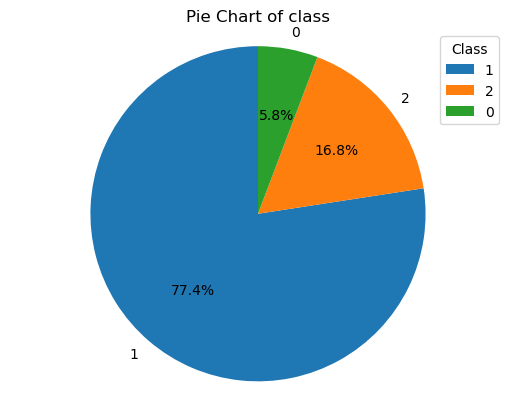

In [5]:
# Pie chart for the categorical column (class)
plt.figure()
class_counts = df['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of class')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.legend(class_counts.index, title="Class", loc="best")  # Add legend to the pie chart
plt.show()

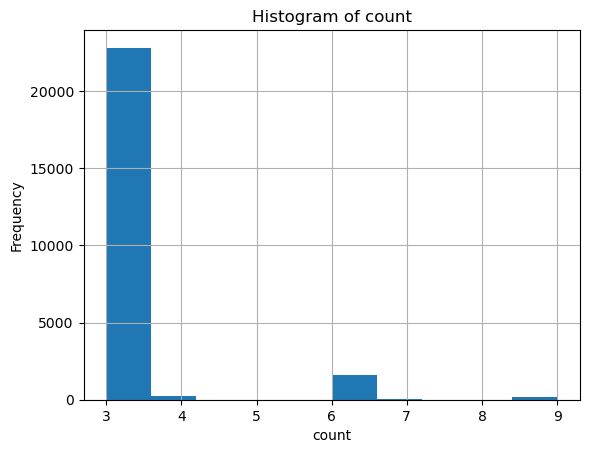

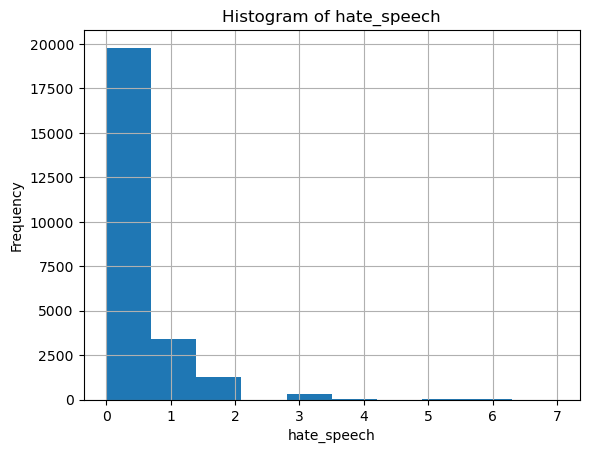

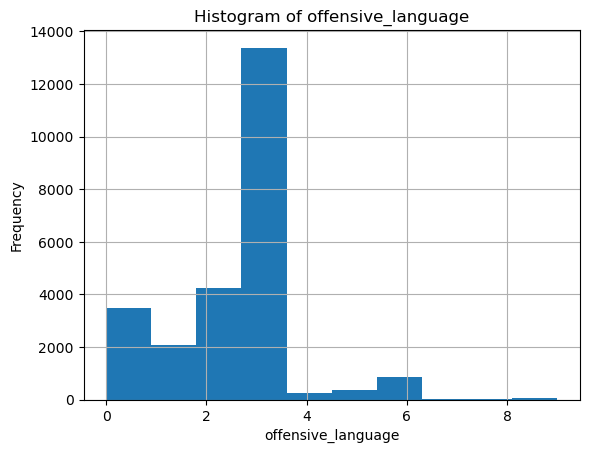

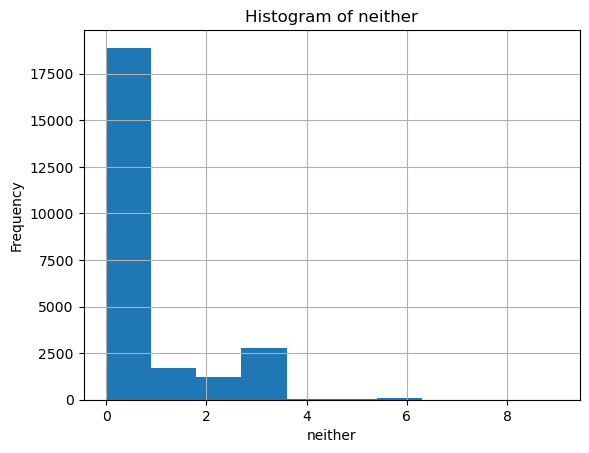

In [12]:
# Histograms for continuous columns
for col in ['count', 'hate_speech', 'offensive_language', 'neither']:
    plt.figure()
    df[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

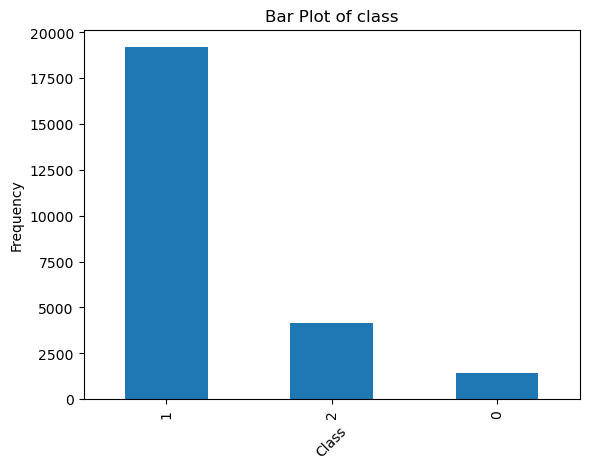

In [16]:
# Bar plots for the categorical column (class)
plt.figure()
df['class'].value_counts().plot.bar()
plt.title('Bar Plot of class')
plt.xlabel('Class', rotation=45)
plt.ylabel('Frequency')
plt.show()

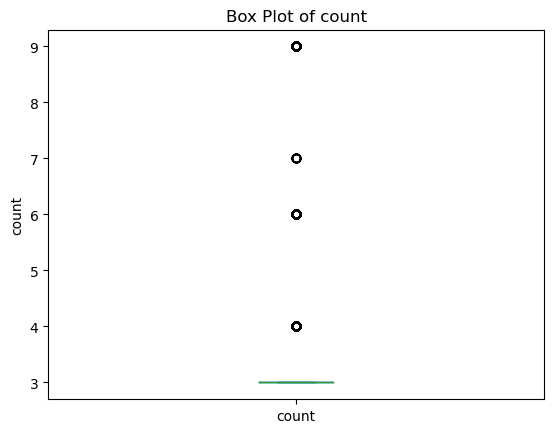

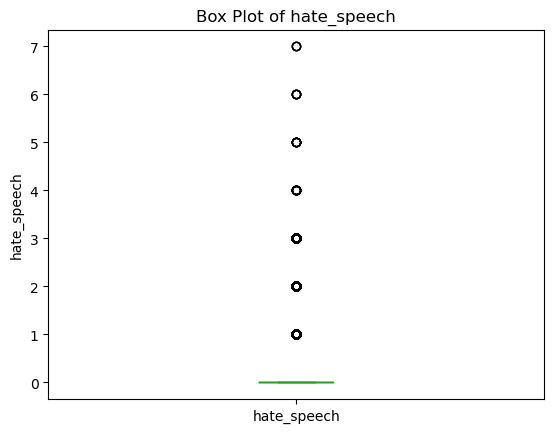

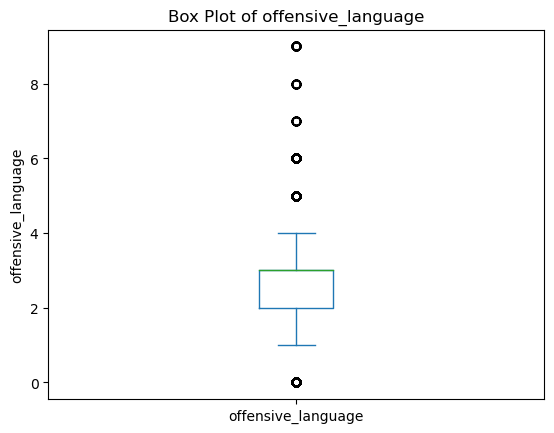

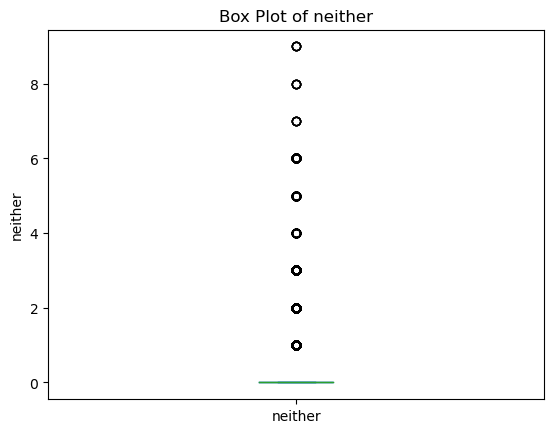

In [17]:
# Box plots for continuous columns
for col in ['count', 'hate_speech', 'offensive_language', 'neither']:
    plt.figure()
    df[col].plot.box()
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

<Figure size 640x480 with 0 Axes>

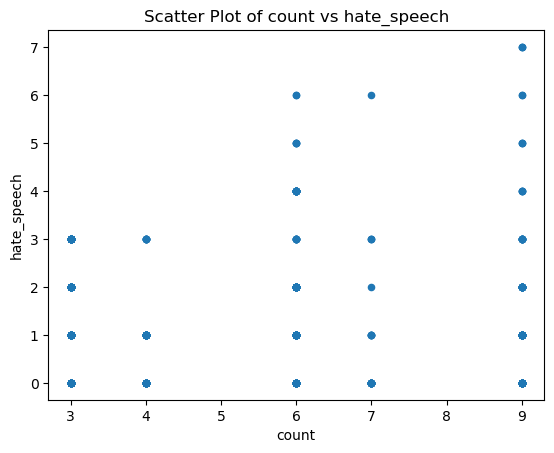

<Figure size 640x480 with 0 Axes>

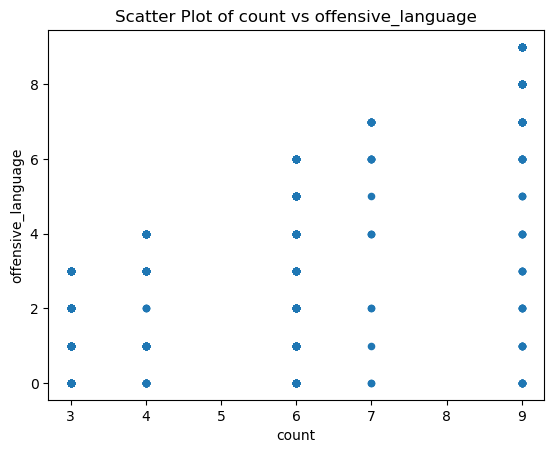

<Figure size 640x480 with 0 Axes>

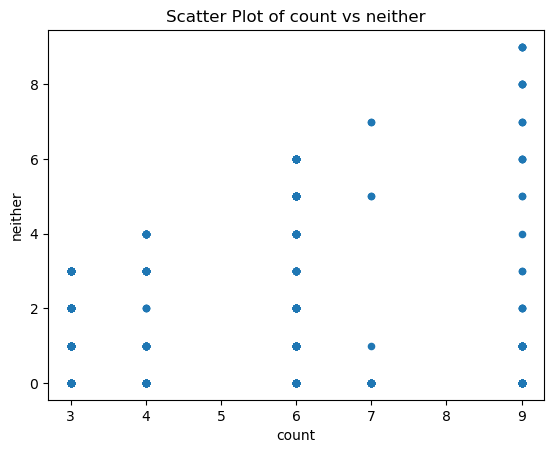

<Figure size 640x480 with 0 Axes>

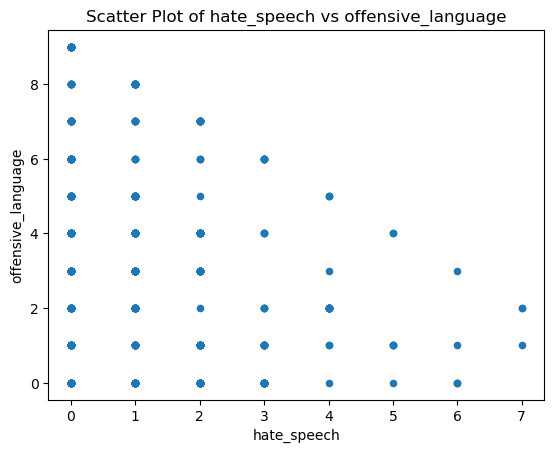

<Figure size 640x480 with 0 Axes>

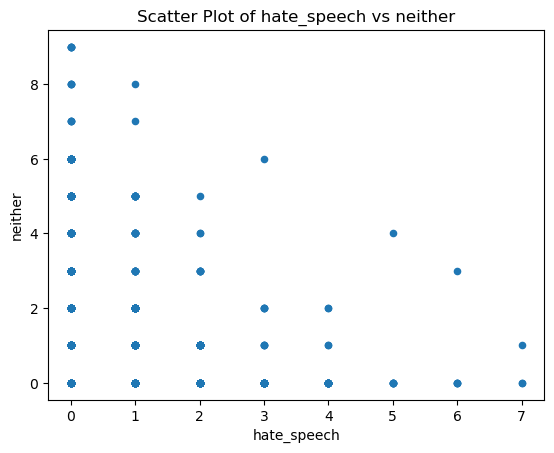

<Figure size 640x480 with 0 Axes>

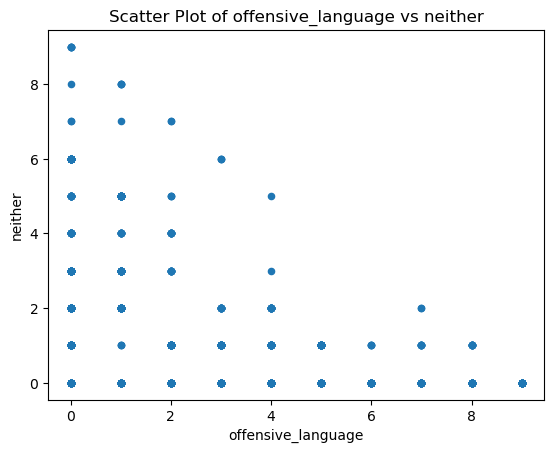

In [18]:
# Scatter plots for pairs of continuous columns
continuous_columns = ['count', 'hate_speech', 'offensive_language', 'neither']
for i in range(len(continuous_columns)):
    for j in range(i + 1, len(continuous_columns)):
        plt.figure()
        df.plot.scatter(x=continuous_columns[i], y=continuous_columns[j])
        plt.title(f'Scatter Plot of {continuous_columns[i]} vs {continuous_columns[j]}')
        plt.show()

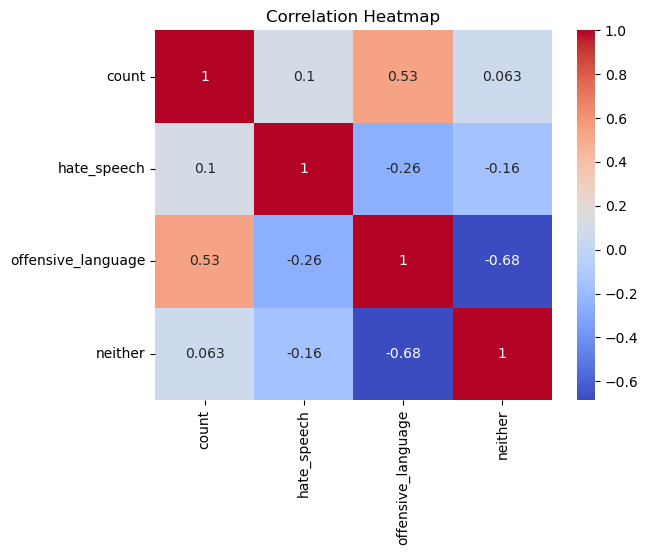

In [19]:
# Heatmap for the correlation between continuous columns
plt.figure()
corr_matrix = df[continuous_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Summary Statistics for Continuous Variables:
              count   hate_speech  offensive_language       neither
count  24783.000000  24783.000000        24783.000000  24783.000000
mean       3.243473      0.280515            2.413711      0.549247
std        0.883060      0.631851            1.399459      1.113299
min        3.000000      0.000000            0.000000      0.000000
25%        3.000000      0.000000            2.000000      0.000000
50%        3.000000      0.000000            3.000000      0.000000
75%        3.000000      0.000000            3.000000      0.000000
max        9.000000      7.000000            9.000000      9.000000


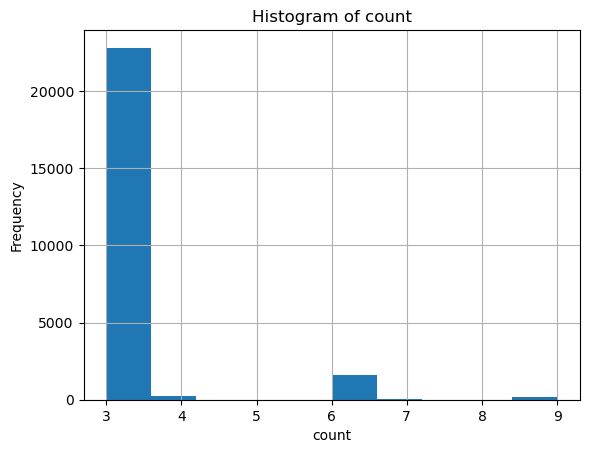

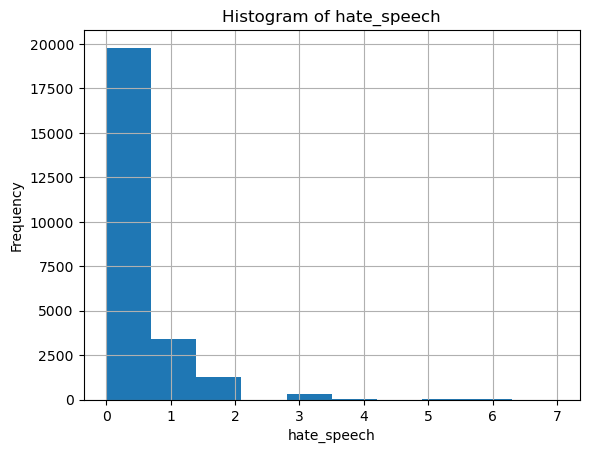

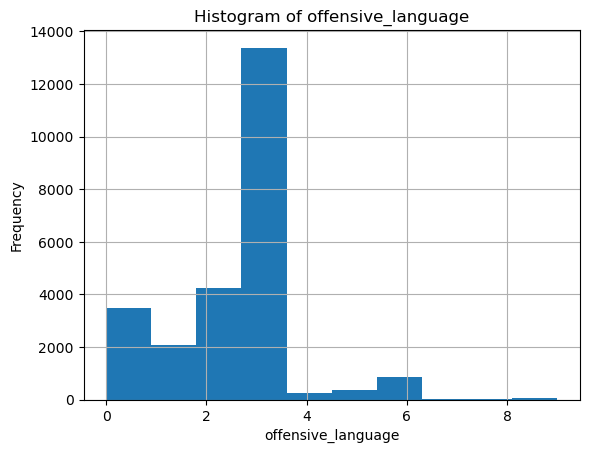

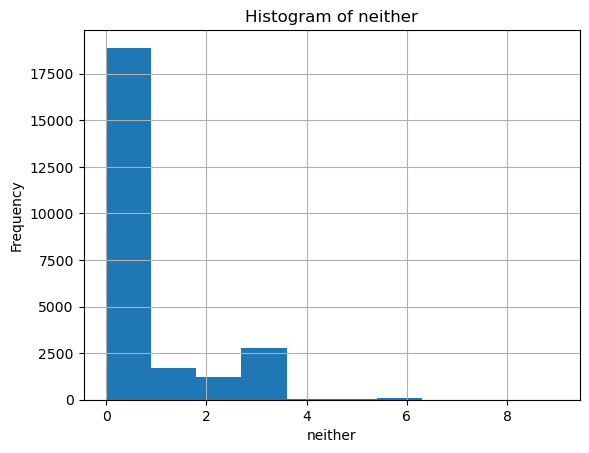

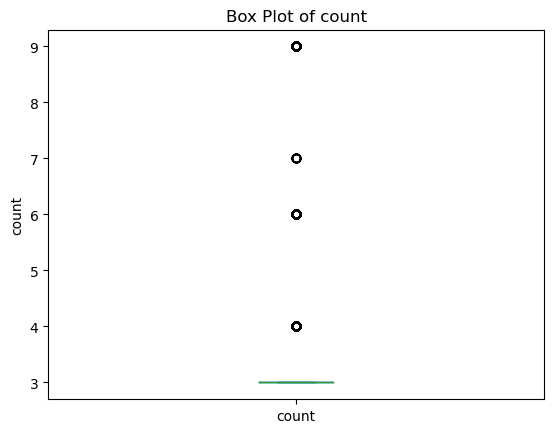

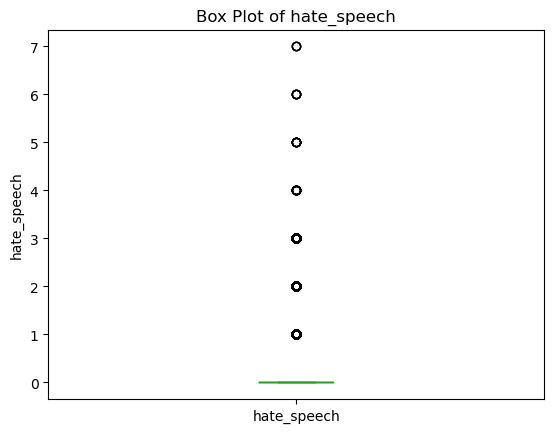

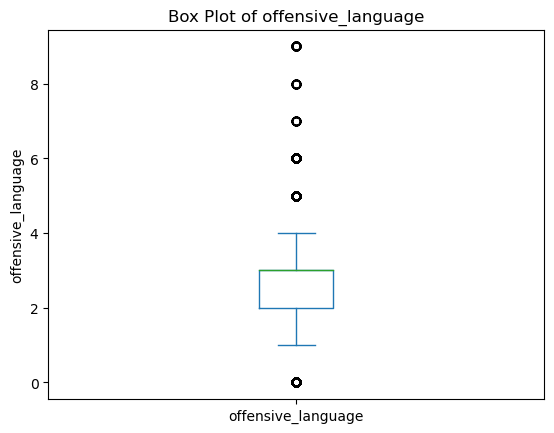

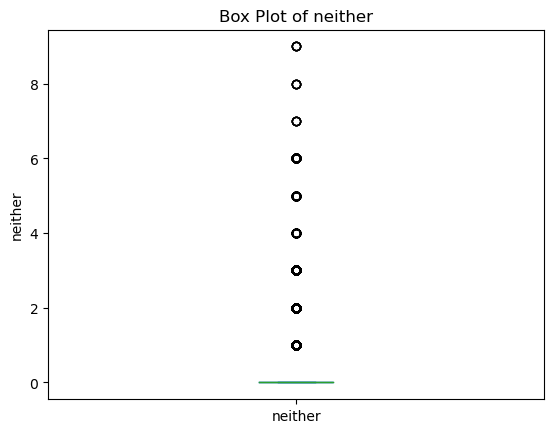


Summary Statistics for Categorical Variables:
class
1        19190
2         4163
0         1430
dtype: int64


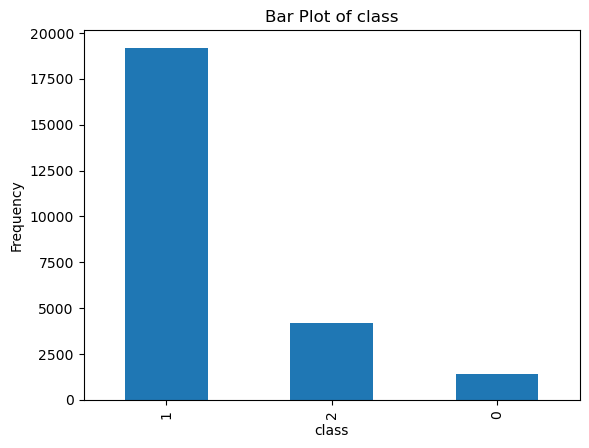

In [20]:
# Univariate Analysis: Continuous Variables

# Summary statistics
continuous_vars = ['count', 'hate_speech', 'offensive_language', 'neither']
print("Summary Statistics for Continuous Variables:")
print(df[continuous_vars].describe())

# Histograms
for col in continuous_vars:
    plt.figure()
    df[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots
for col in continuous_vars:
    plt.figure()
    df[col].plot.box()
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

# Univariate Analysis: Categorical Variables

# Summary statistics
categorical_vars = ['class']
print("\nSummary Statistics for Categorical Variables:")
print(df[categorical_vars].value_counts())

# Bar plots
for col in categorical_vars:
    plt.figure()
    df[col].value_counts().plot.bar()
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()